In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [58]:
df = pd.read_csv('Salary_dataset.csv')
x_train, y_train = df['YearsExperience'].values, df['Salary'].values
n = len(x_train)
w, c = 0.0, 0.0
rate = 0.001

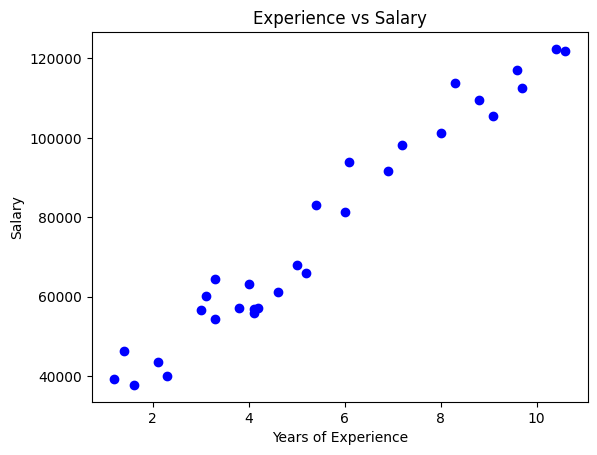

In [60]:
def y_pred(x, m, b):
    return x*m + b

In [61]:
def dj_dm(x, y, m, b):
    """Compute derivative of MSE loss w.r.t. m (slope)."""
    res = 0.0
    n_local = len(x)
    for i in range(n_local):
        res += x[i] * (y[i] - (m * x[i] + b))
    # derivative of (1/n) * sum (y - (mx+b))^2 w.r.t m is -2/n * sum x*(y - (mx+b))
    res *= -2.0 / n_local
    return res

In [62]:
def dj_db(x, y, m, b):
    """Compute derivative of MSE loss w.r.t. b (intercept)."""
    res = 0.0
    n_local = len(x)
    for i in range(n_local):
        res += (y[i] - (m * x[i] + b))
    # derivative of (1/n) * sum (y - (mx+b))^2 w.r.t b is -2/n * sum (y - (mx+b))
    res *= -2.0 / n_local
    return res

In [63]:
for i in range(10000):
    w -= rate * dj_dm(x_train, y_train, w, c)
    c -= rate * dj_db(x_train, y_train, w, c)

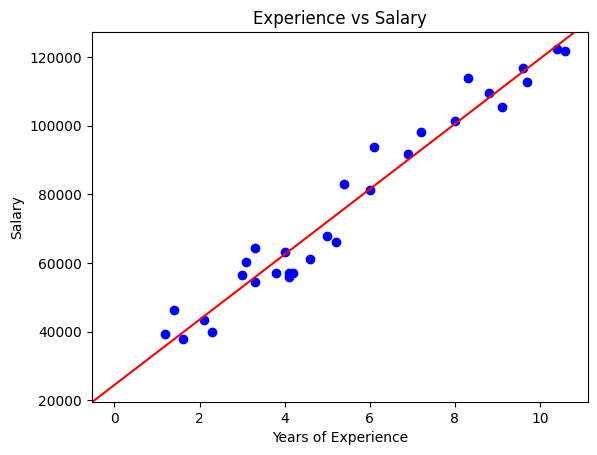

In [66]:
plt.axline(xy1=(0, c), slope=w, color='r', label=f'y = {w}x + {c}')
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', marker='o')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()